Problem: Toronto, the capital of the province of Ontario, is the most populous Canadian city. Its diversity is reflected in Toronto’s ethnic neighborhoods such as Chinatown, Corso Italia, Greektown, Kensington Market, Koreatown, Little India, Little Italy, Little Jamaica, Little Portugal & Roncesvalles. With more than half of the entire Indian Canadian population residing in Toronto it is one of the best places to start an Indian restaurant. 

The objective of this project is to determine the most suitable location in Toronto to set up a new Indian restaurant. The parameters that will be examined are the demographics of each district and the number of pre-existing Indian restaurants in each area. 


# Import the Libraries

In [54]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import wikipedia as wp
import json # library to handle JSON files

#Use geopy library to get the latitude and longitude values of New York City
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

#!pip install folium
import folium # map rendering library


# Web Scraping the postalcodes, Boroughs and Neighborhoods

In [55]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url, 'xml')

table=soup.find('table')
column_names = ['Postalcode','Borough','Neighborhood']
df = pd.DataFrame(columns = column_names)

In [56]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==3:
        df.loc[len(df)] = row_data

In [57]:
df.head()

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


# Data Cleansing

In [58]:
# check names of indexes for which Borough column has value "Not assigned"
indexNames = df[ df['Borough'] =='Not assigned'].index

# Delete the row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.loc[df['Neighborhood'] =='Not assigned' , 'Neighborhood'] = df['Borough']
result = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df_new=result.reset_index()
df_new.head(10)

,Postalcode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [59]:
df_cor = pd.read_csv("Geospatial_Coordinates.csv")
df_cor.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [60]:
df_cor.columns=['Postalcode','Latitude','Longitude']

Df_new2 = pd.merge(df_new,
                 df_cor[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
Df_new2

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [61]:
toronto_DF = pd.merge(df,Df_new2, on='Postalcode')
toronto_DF

,Postalcode,Borough_x,Neighborhood_x,Borough_y,Neighborhood_y,Latitude,Longitude
0,M3A,North York,Parkwoods,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [62]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="my_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

# Defining the Foursquare Client ID to gather venue data info

In [63]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'XKZS2V2MDC1MMEYUR4GUJGVJF4VUJUMZ1HUJ2ZFBV50E0SD3' # your Foursquare ID
    CLIENT_SECRET = 'OG41KMOIHKYOLDWIFPLVFRAHRNQZK0IOG5SK0UYFUXZNCCHQ' # your Foursquare Secret
    VERSION = '20200913' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [64]:
# The total neighborhood list which contains indian restaurants in Toronto City
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_toronto=pd.DataFrame(columns=column_names)
count=1
for row in Df_new2.values.tolist():
    Postalcode, Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_restaurants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Df_new2),')','Indian Restaurants in '+Neighborhood+', '+Borough+':'+str(len(indian_restaurants)))
    for restaurant_detail in indian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        indian_rest_toronto = indian_rest_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)


( 1 / 103 ) Indian Restaurants in Parkwoods, North York:0
( 1 / 103 ) Indian Restaurants in Victoria Village, North York:0
( 1 / 103 ) Indian Restaurants in Regent Park, Harbourfront, Downtown Toronto:2
( 1 / 103 ) Indian Restaurants in Lawrence Manor, Lawrence Heights, North York:0
( 1 / 103 ) Indian Restaurants in Queen's Park, Ontario Provincial Government, Downtown Toronto:1
( 1 / 103 ) Indian Restaurants in Islington Avenue, Humber Valley Village, Etobicoke:0
( 1 / 103 ) Indian Restaurants in Malvern, Rouge, Scarborough:0
( 1 / 103 ) Indian Restaurants in Don Mills, North York:1
( 1 / 103 ) Indian Restaurants in Parkview Hill, Woodbine Gardens, East York:0
( 1 / 103 ) Indian Restaurants in Garden District, Ryerson, Downtown Toronto:0
( 1 / 103 ) Indian Restaurants in Glencairn, North York:0
( 1 / 103 ) Indian Restaurants in West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale, Etobicoke:0
( 1 / 103 ) Indian Restaurants in Rouge Hill, Port Union, Highland Creek, S

Displays the first 8 records containing the list of Indian restaurants in Toronto and their boroughs and neighborhoods

In [65]:
indian_rest_toronto.head(8)

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,"Regent Park, Harbourfront",4af9a379f964a520c91222e3,Bombay Palace
1,Downtown Toronto,"Regent Park, Harbourfront",52af6dc5498e33995b0bbf03,Sultan Of Samosas
2,Downtown Toronto,"Queen's Park, Ontario Provincial Government",4bedf8b5e24d20a17b567214,Kothur Indian Cuisine
3,North York,Don Mills,5c229362a0215b002cb89eb2,Butter Chicken Roti
4,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
5,East Toronto,The Beaches,4b60e4a1f964a52023002ae3,ali's tandoori curry house
6,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
7,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant


In [66]:
indian_rest_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       50 non-null     object
 1   Neighborhood  50 non-null     object
 2   ID            50 non-null     object
 3   Name          50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


# Analysis

Number of each Indian restaurants for each borough

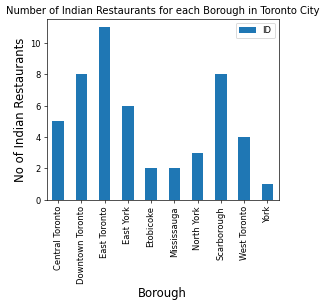

In [109]:
plt.figure(figsize=(5,4), dpi = 60)
# Title
plt.title('Number of Indian Restaurants for each Borough in Toronto City')
# x-axis
plt.xlabel('Borough', fontsize = 14)
# y-axis
plt.ylabel('No of Indian Restaurants', fontsize=14)
#Creating bar plot
indian_rest_toronto.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


In [68]:
## Now we will check top 10 Neighborhoods which has max no of Indian Restaurant present.
Toronto_top_4_Neighbor = indian_rest_toronto.groupby('Neighborhood')['ID'].count().nlargest(4).to_frame(name='Total')
Toronto_top_4_Neighbor=Toronto_top_4_Neighbor.reset_index()
Toronto_top_4_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Indian Restaurant"}, inplace=True)
Toronto_top_4_Neighbor

,Neighborhood,Total Indian Restaurant
0,"India Bazaar, The Beaches West",8
1,Thorncliffe Park,4
2,Davisville,3
3,"Brockton, Parkdale Village, Exhibition Place",2


Top 4 Neighborhoods having Maximum number of Indian restaurants

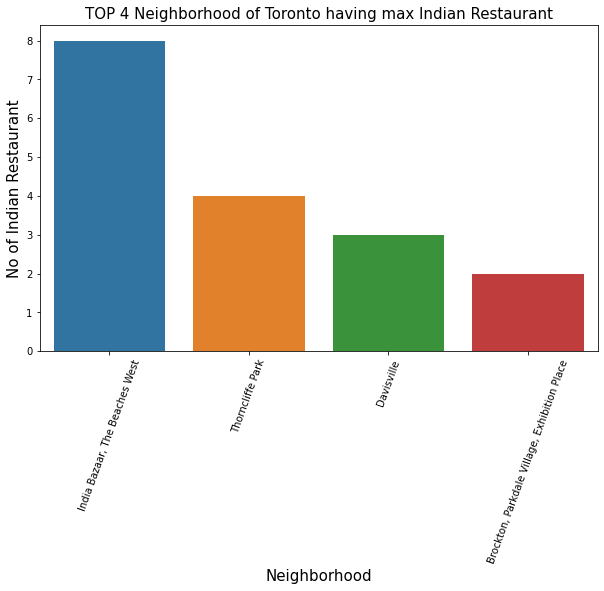

In [69]:
fig = plt.figure(figsize=(10,6))
s=sns.barplot(x="Neighborhood", y="Total Indian Restaurant", data=Toronto_top_4_Neighbor)
s.set_xticklabels(s.get_xticklabels(), rotation=70)
plt.title('TOP 4 Neighborhood of Toronto having max Indian Restaurant', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("No of Indian Restaurant", fontsize=15)
#plt.savefig("TOP_5_Neighborhood.png", dpi=300)
plt.show()


In [70]:
## Now we will check top 10 Neighborhoods which has max no of Indian Restaurant present.
Toronto_bottom_4_Neighbor = indian_rest_toronto.groupby('Neighborhood')['ID'].count().nsmallest(4).to_frame(name='Total')
Toronto_top_4_Neighbor=Toronto_bottom_4_Neighbor.reset_index()
Toronto_top_4_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Indian Restaurant"}, inplace=True)
Toronto_top_4_Neighbor

,Neighborhood,Total Indian Restaurant
0,Agincourt,1
1,"Bedford Park, Lawrence Manor East",1
2,Church and Wellesley,1
3,Don Mills,1


In [72]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Don Mills']

,Borough,Neighborhood,ID,Name
3,North York,Don Mills,5c229362a0215b002cb89eb2,Butter Chicken Roti


In [73]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Church and Wellesley']

,Borough,Neighborhood,ID,Name
49,Downtown Toronto,Church and Wellesley,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine


In [21]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Agincourt']

,Borough,Neighborhood,ID,Name
40,Scarborough,Agincourt,4d570727fb65236a7f600db4,Silver Spoon Pak-Indian Restaurant


In [75]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Bedford Park, Lawrence Manor East']

,Borough,Neighborhood,ID,Name
30,North York,"Bedford Park, Lawrence Manor East",4d796616542ab1f75eb87c41,The Copper Chimney


In [76]:
toronto_top_merge = Toronto_top_4_Neighbor.join(Df_new2.set_index("Neighborhood"), on="Neighborhood")


In [77]:
#overall population distribution 
html = wp.page("Demographics of Toronto").html().encode("UTF-8")

In [78]:
#TORONTO & EAST YORK population distribution by ethnicity 
TEY_population_df = pd.read_html(html, header = 0)[13]
TEY_population_df = TEY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
TEY_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [79]:
#NORTH YORK population distribution by ethnicity 
North_population_df = pd.read_html(html, header = 0)[14]
North_population_df = North_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
North_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#SCARBOROUGH population distribution by ethnicity 
Scar_population_df = pd.read_html(html, header = 0)[15]
Scar_population_df = Scar_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
Scar_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#ETOBICOKE & YORK population distribution by ethnicity 
ETY_population_df = pd.read_html(html, header = 0)[16]
ETY_population_df = ETY_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
ETY_population_df

,"Ethnic groups in the Toronto CMA (2016)Source: Focus on Geography Series, 2016 Census; Toronto, (CMA) - Ontario","Ethnic groups in the Toronto CMA (2016)Source: Focus on Geography Series, 2016 Census; Toronto, (CMA) - Ontario.1",Population,Ethnic Origin 1 in %
0,Ethnic group,White,2804630,47.8
1,Ethnic group,South Asian,973225,16.6
2,Ethnic group,Chinese,631045,10.8
3,Ethnic group,Black,442020,7.5
4,Ethnic group,Filipino,254480,4.3
5,Ethnic group,Latin American,132950,2.3
6,Ethnic group,West Asian,123755,2.1
7,Ethnic group,Arab,105610,1.8
8,Ethnic group,Southeast Asian,83540,1.4
9,Ethnic group,Korean,69670,1.2


In [82]:
#Merge all the population table with the ethnic percentage by neighborhood
ET = ETY_population_df.append(TEY_population_df,sort=True).reset_index()
ET.drop('index',axis=1,inplace=True)
SN = North_population_df.append(Scar_population_df,sort=True).reset_index()
SN.drop('index',axis=1,inplace=True)
pop_ethnic_df = SN.append(ET,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)
pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                                ]]
pop_ethnic_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
7,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
9,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#Filtering the riding with Indian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'East Indian')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'East Indian')]
                                      
pop_indian_df = pd.DataFrame(temp).reset_index()
pop_indian_df.drop('index',axis=1,inplace=True)

pop_indian_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
9,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [84]:
#retaining only Indian ethnic percentage & the neighborhood name 
columns_list = pop_indian_df.columns.to_list()
pop_indian_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_indian_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_indian_df.at[i, j] == 'East Indian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_indian_DF_with_percent = pop_indian_DF_with_percent.append({'Riding':pop_indian_df.at[i, 'Riding'], 'Population':pop_indian_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_indian_df.at[i, j], 'Percentage': pop_indian_df.at[i, percent_col]},ignore_index=True)



Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origi

In [86]:
pop_indian_DF_with_percent

,Ethnicity,Percentage,Population,Riding
0,East Indian,12.2,110450.0,Scarborough Centre
1,East Indian,8.2,108295.0,Scarborough Southwest
2,East Indian,7.4,104225.0,Scarborough-Agincourt
3,East Indian,16.7,101445.0,Scarborough-Rouge Park
4,East Indian,18.0,101115.0,Scarborough-Guildwood
5,East Indian,11.8,97610.0,Scarborough North
6,East Indian,22.2,116960.0,Etobicoke North
7,East Indian,7.3,109060.0,Don Valley North
8,East Indian,9.2,107725.0,Humber River-Black Creek
9,East Indian,10.6,93170.0,Don Valley East


In [87]:
pop_indian_DF_with_percent['Indian Population'] = (pop_indian_DF_with_percent['Percentage'] * pop_indian_DF_with_percent['Population'])/100
pop_indian_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_indian_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_indian_DF_with_percent

,Riding,Indian Population
0,Scarborough Centre,13474.900
1,Scarborough Southwest,8880.190
2,Scarborough-Agincourt,7712.650
3,Scarborough-Rouge Park,16941.315
4,Scarborough-Guildwood,18200.700
5,Scarborough North,11517.980
6,Etobicoke North,25965.120
7,Don Valley North,7961.380
8,Humber River-Black Creek,9910.700
9,Don Valley East,9876.020


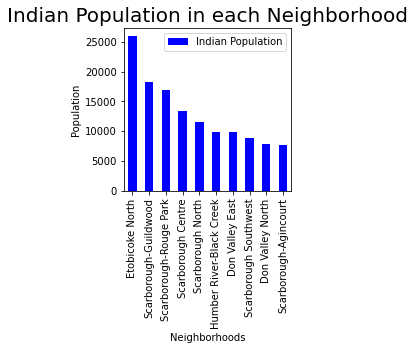

In [114]:
bar_graph = pop_indian_DF_with_percent.sort_values(by='Indian Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Indian Population',figsize=(3, 3), color='blue')
plt.title("Indian Population in each Neighborhood",fontsize=20)
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

In [89]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings
riding_list = pop_indian_DF_with_percent['Riding'].to_list()
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list

['Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood',
 'Scarborough North (electoral district)',
 'Etobicoke North',
 'Don Valley North',
 'Humber River-Black Creek',
 'Don Valley East']

In [90]:
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df

,Riding,Neighborhoods
0,Scarborough Centre (electoral district),Scarborough City Centre (west of McCowan Road...
1,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
2,Scarborough-Agincourt,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
3,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
4,Scarborough-Guildwood,"Guildwood, West Hill (west of Morningside Ave..."
5,Scarborough North (electoral district),"Agincourt (east of Midland Avenue), Milliken ..."
6,Etobicoke North,"The Elms, Humberwood, Kingsview Village, This..."
7,Don Valley North,"Henry Farm, Bayview Village, Bayview Woods-St..."
8,Humber River-Black Creek,"Humber Summit, Humbermede, Humberlea, York Un..."
9,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."


In [91]:
## Now we will check top 10 Neighborhoods which has max no of Indian Restaurant present.
Toronto_bottom_5_Neighbor = indian_rest_toronto.groupby('Neighborhood')['ID'].count().nsmallest(5).to_frame(name='Total')
Toronto_bottom_5_Neighbor=Toronto_bottom_5_Neighbor.reset_index()
Toronto_bottom_5_Neighbor.rename(index=str, columns={"index": "Neighborhood", "Total": "Total Indian Restaurant"}, inplace=True)
Toronto_bottom_5_Neighbor

,Neighborhood,Total Indian Restaurant
0,Agincourt,1
1,"Bedford Park, Lawrence Manor East",1
2,Church and Wellesley,1
3,Don Mills,1
4,"East Toronto, Broadview North (Old East York)",1


In [92]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Bedford Park, Lawrence Manor East']

,Borough,Neighborhood,ID,Name
30,North York,"Bedford Park, Lawrence Manor East",4d796616542ab1f75eb87c41,The Copper Chimney


In [93]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Don Valley North']

,Borough,Neighborhood,ID,Name


In [94]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Don Valley East']

,Borough,Neighborhood,ID,Name


In [95]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Thorncliffe Park']

,Borough,Neighborhood,ID,Name
12,East York,Thorncliffe Park,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre
13,East York,Thorncliffe Park,507a19e5e4b0602b62f73d11,Faley Restaurant
14,East York,Thorncliffe Park,4bed9f2fbac3c9b6ad93fee9,Hakka Garden
15,East York,Thorncliffe Park,4b7c3428f964a52047842fe3,Capital Sweets and Samosas


In [96]:
indian_rest_toronto.groupby('Borough')['ID'].count()

Borough
Central Toronto      5
Downtown Toronto     8
East Toronto        11
East York            6
Etobicoke            2
Mississauga          2
North York           3
Scarborough          8
West Toronto         4
York                 1
Name: ID, dtype: int64

In [97]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Leaside']

,Borough,Neighborhood,ID,Name
7,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant


In [98]:
indian_rest_toronto[indian_rest_toronto['Borough']=='York']

,Borough,Neighborhood,ID,Name
31,York,"Runnymede, The Junction North",4b3bd657f964a520377c25e3,Roti Time


In [99]:
indian_rest_toronto[indian_rest_toronto['Borough']=='Etobicoke']

,Borough,Neighborhood,ID,Name
45,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",4bc10d44abf49521d773c093,Bombay on the Lake
48,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",4af1c64ff964a5200ae321e3,Chutneys Fine Indian Cuisine


In [100]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='High Park, The Junction South']

,Borough,Neighborhood,ID,Name
34,West Toronto,"High Park, The Junction South",4b511f6ff964a520994327e3,Curry Twist


In [101]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Runnymede, Swansea']

,Borough,Neighborhood,ID,Name
44,West Toronto,"Runnymede, Swansea",525e1812498e2c14b4d80b8b,Bukhara indian cuisine


In [102]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='New Toronto, Mimico South, Humber Bay Shores']

,Borough,Neighborhood,ID,Name
45,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",4bc10d44abf49521d773c093,Bombay on the Lake


In [105]:
indian_rest_toronto[indian_rest_toronto['Neighborhood']=='Guildwood, West Hill (west of Morningside Ave..']

,Borough,Neighborhood,ID,Name


In [103]:
pop_indian_DF_with_percent

,Riding,Indian Population
0,Scarborough Centre,13474.900
1,Scarborough Southwest,8880.190
2,Scarborough-Agincourt,7712.650
3,Scarborough-Rouge Park,16941.315
4,Scarborough-Guildwood,18200.700
5,Scarborough North,11517.980
6,Etobicoke North,25965.120
7,Don Valley North,7961.380
8,Humber River-Black Creek,9910.700
9,Don Valley East,9876.020


In [49]:
indian_rest_toronto.groupby('Borough')['ID'].count()

Borough
Central Toronto      5
Downtown Toronto     8
East Toronto        11
East York            6
Etobicoke            2
Mississauga          2
North York           3
Scarborough          8
West Toronto         4
York                 1
Name: ID, dtype: int64

Results: 
     As expected Downtown, Central and East Toronto have the highest concentrations of Indian restaurants. Boroughs like Etobicoke, York, and Missisauga have the least concentrations of Indian restaurants. The population dataset was based off of the ridings instead of the boroughs. Since Scarborough has a significant concentration of Indian restaurants that area is not being considered suitable for opening a new restaurant. The areas which are being considered are Don Valley North, Don Valley East, Etobicoke North, Agincourt and York Borough. 

Conclusions:
    According to the Toronto demographics the largest concentrations of the Indian community reside in Etobicoke, Scarborough-Rouge Park, and Scarborough-Guildwood. They would be considered the top sites to set up a new Indian restaurant. Etobicoke has the most Indian population with at least 25K people followed by Scarborough-Guildwood with about 18K and Scarborough-Rouge Park with about 17K. 

Limitations:
    This is based on the assumption that only the Indian community likes Indian restaurants which I know is not the case. Several Americans and people of other ethnicities also love Indian food. Another factor that entrepreneurs consider is operating costs and rent in certain districts. 